## Import Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import nltk
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

import warnings
warnings.filterwarnings('ignore')

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Developer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Developer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Developer\AppData\Roaming\nltk_data...


[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## Load datasets

In [6]:
df = pd.read_csv('../src/data/train_clean.csv')

In [7]:
df.head()

count  hate_speech_count  offensive_language_count  neither_count  class  \
0      3                  0                         0              3      2   
1      3                  0                         3              0      1   
2      3                  0                         3              0      1   
3      3                  0                         2              1      1   
4      6                  0                         6              0      1   

                                                                                                 tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...   
1                !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...   
3                                       !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...   

                                                                     clean_tweet  
0  mayasolovely woman shouldnt complain cleaning house amp man always take trash  
1                         mleew boy dat coldtyga dwn bad cuffin dat hoe st place  
2           urkindofbrand dawg sbabylife ever fuck bitch start cry confused shit  
3                                       c_g_anderson viva_based look like tranny  
4                  shenikaroberts shit hear might true might faker bitch told ya

## Data Visualization

In [8]:
# Create a bar chart
groups = df.groupby(by='class').count().clean_tweet
groups

class
0     1430
1    19190
2     4163
Name: clean_tweet, dtype: int64

In [9]:
hate_speech = groups[0]
offensive = groups[1]
neither = groups[2]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Hate Speech', 'Offensive', 'Neither'],
    y=[hate_speech, offensive, neither],
    marker_color='indianred',
    width=[0.4, 0.4],
))

fig.update_layout(title='Count of tweet classes', title_x=0.5)

# Show the figure
fig.show()

In [12]:
# Tokenize words
words = df['clean_tweet'].apply(nltk.word_tokenize)

# Flatten the list of words
all_words = [word for sublist in words for word in sublist]

# Calculate frequency distribution
frequency_dist = nltk.FreqDist(all_words)

# Print most common words and frequencies
print(frequency_dist.most_common(10)[0])

('bitch', 11264)


In [13]:
len(frequency_dist)

34776

In [14]:
# Create a DataFrame of the top 25 words
temp = pd.DataFrame(frequency_dist.most_common(15), columns=['word', 'count'])

# Create a bar plot
fig = px.bar(temp, x='word', y='count', title='Top words')

# Rotate the x-ticks vertically
fig.update_layout(xaxis_tickangle=90)

# Show the plot
fig.show()

## Visualize the tweets with wordcloud

In [15]:
mini_df = pd.DataFrame(df[['class', 'clean_tweet']])

In [16]:
# Start with one review:
df_hateful = df[df['class']==0]
df_offensive = df[df['class']==1]
df_neither = df[df['class']==2]

In [22]:
all_tweet = mini_df['clean_tweet'].tolist()
hateful_tweet = df_hateful['clean_tweet'].tolist()
offensive_tweet = df_offensive['clean_tweet'].tolist()
neither_tweet = df_neither['clean_tweet'].tolist()

In [23]:
all_tweet = ' '.join(all_tweet)
hateful_tweet = ' '.join(hateful_tweet)
offensive_tweet = ' '.join(offensive_tweet)
neither_tweet = ' '.join(neither_tweet)

In [20]:
all_tweet = all_tweet.split()
hateful_tweet = hateful_tweet.split()
offensive_tweet = offensive_tweet.split()
neither_tweet = neither_tweet.split()

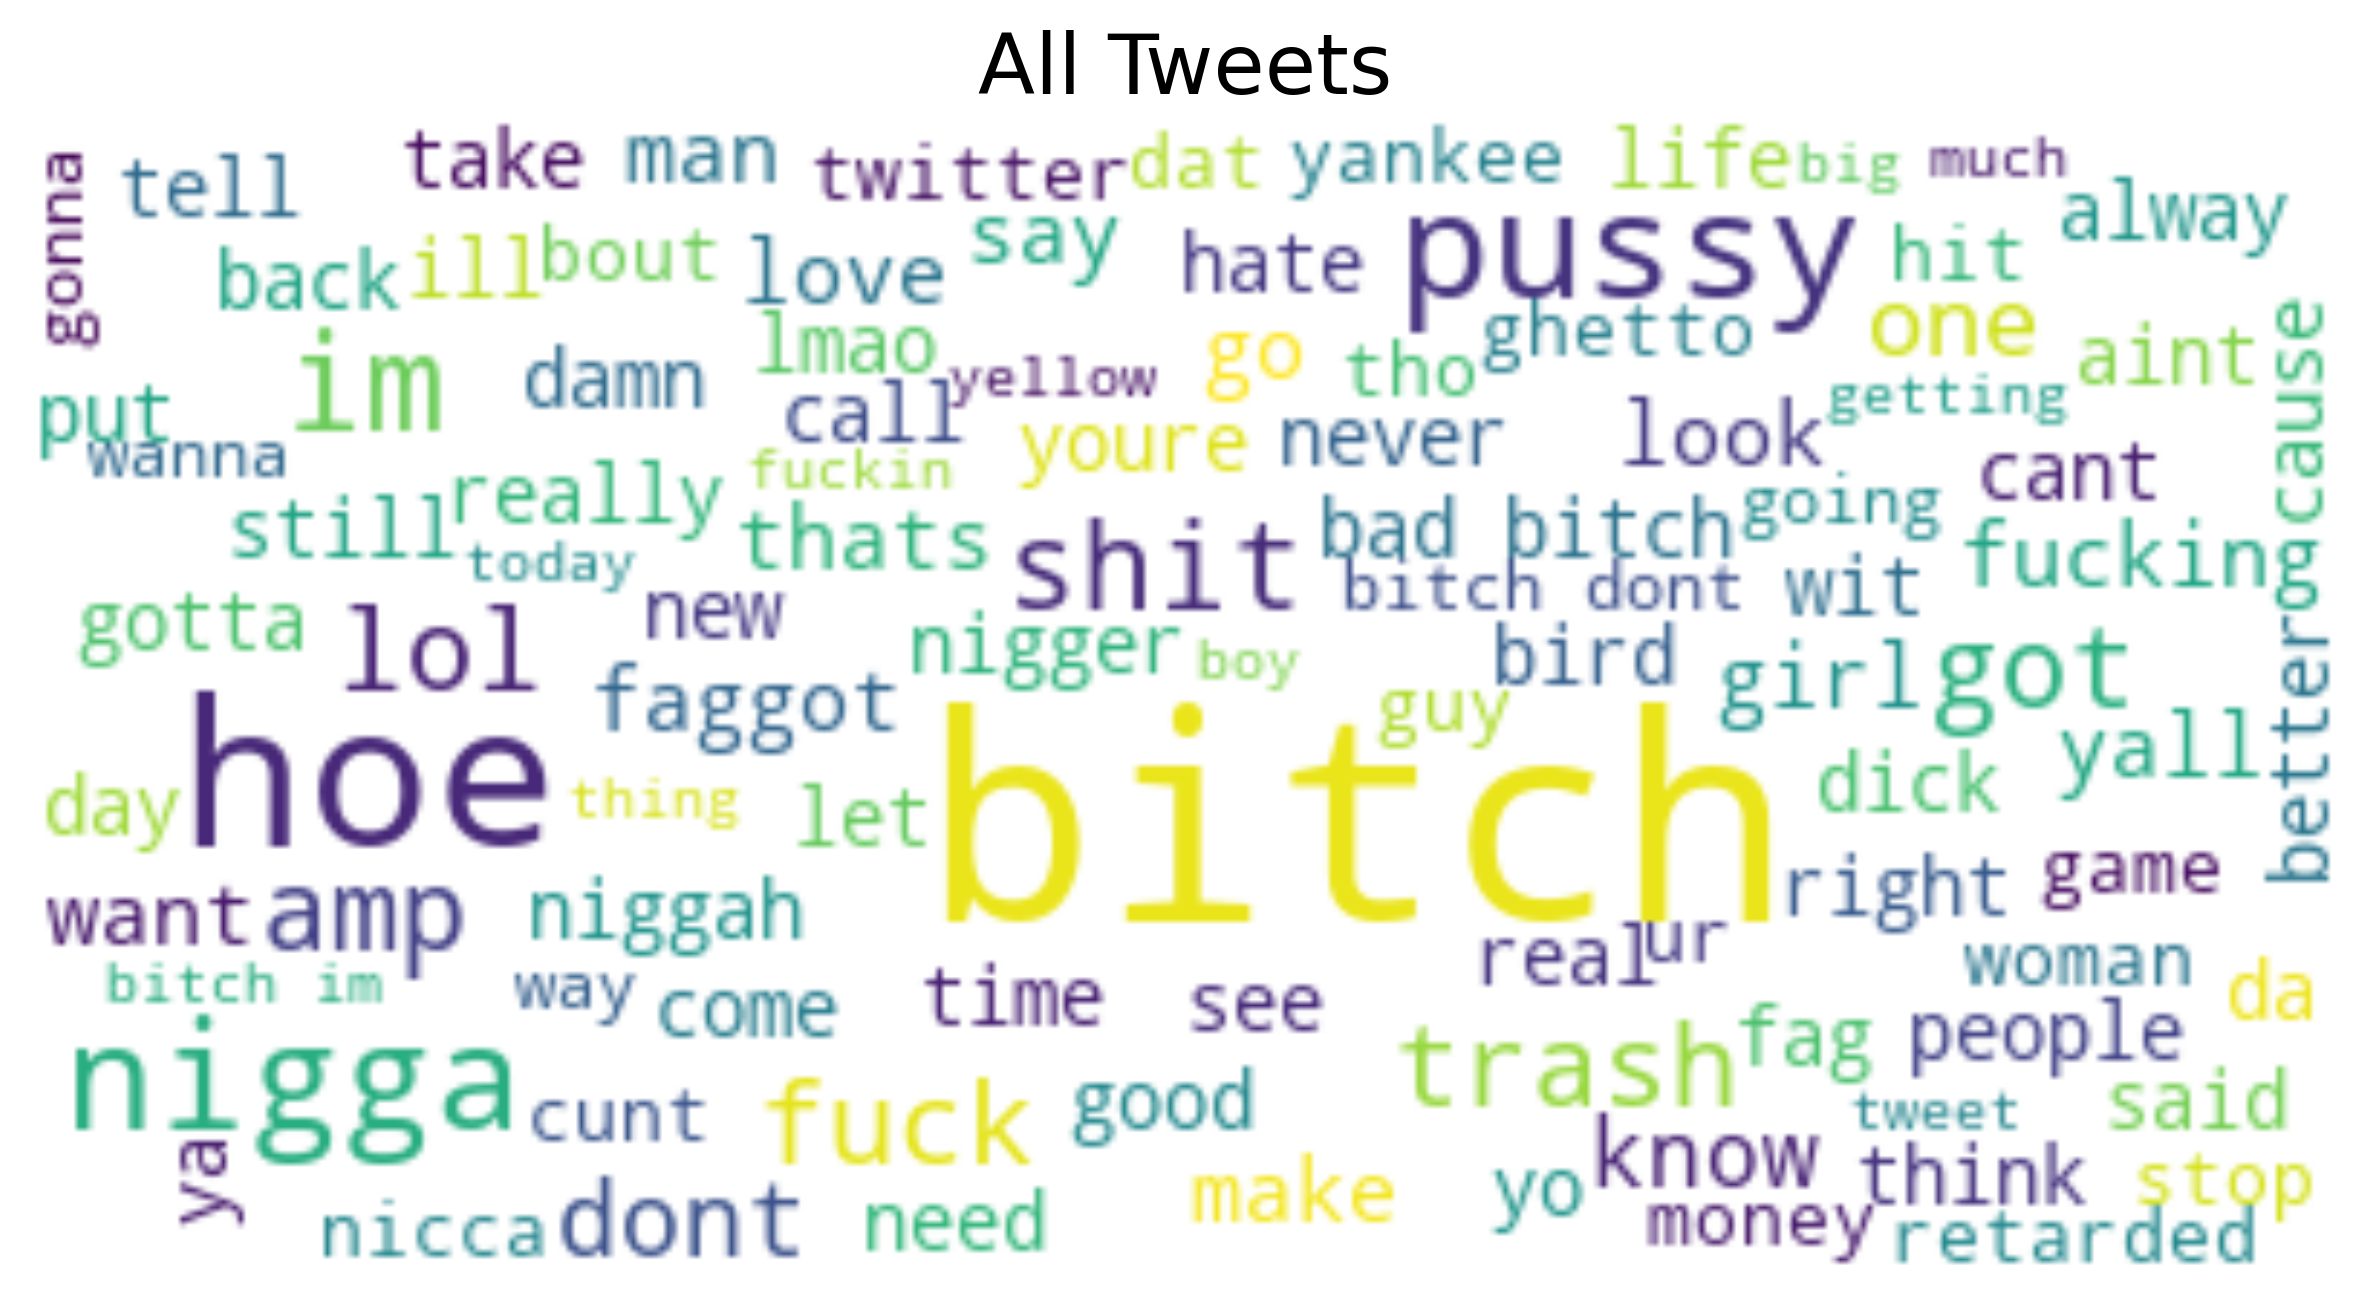

In [24]:
wordcloud = WordCloud(width=400, height=200, max_font_size=50, max_words=100, background_color="white")
wordcloud_all = wordcloud.generate(all_tweet)
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('All Tweets', fontsize=20)
plt.axis('off')
plt.show()

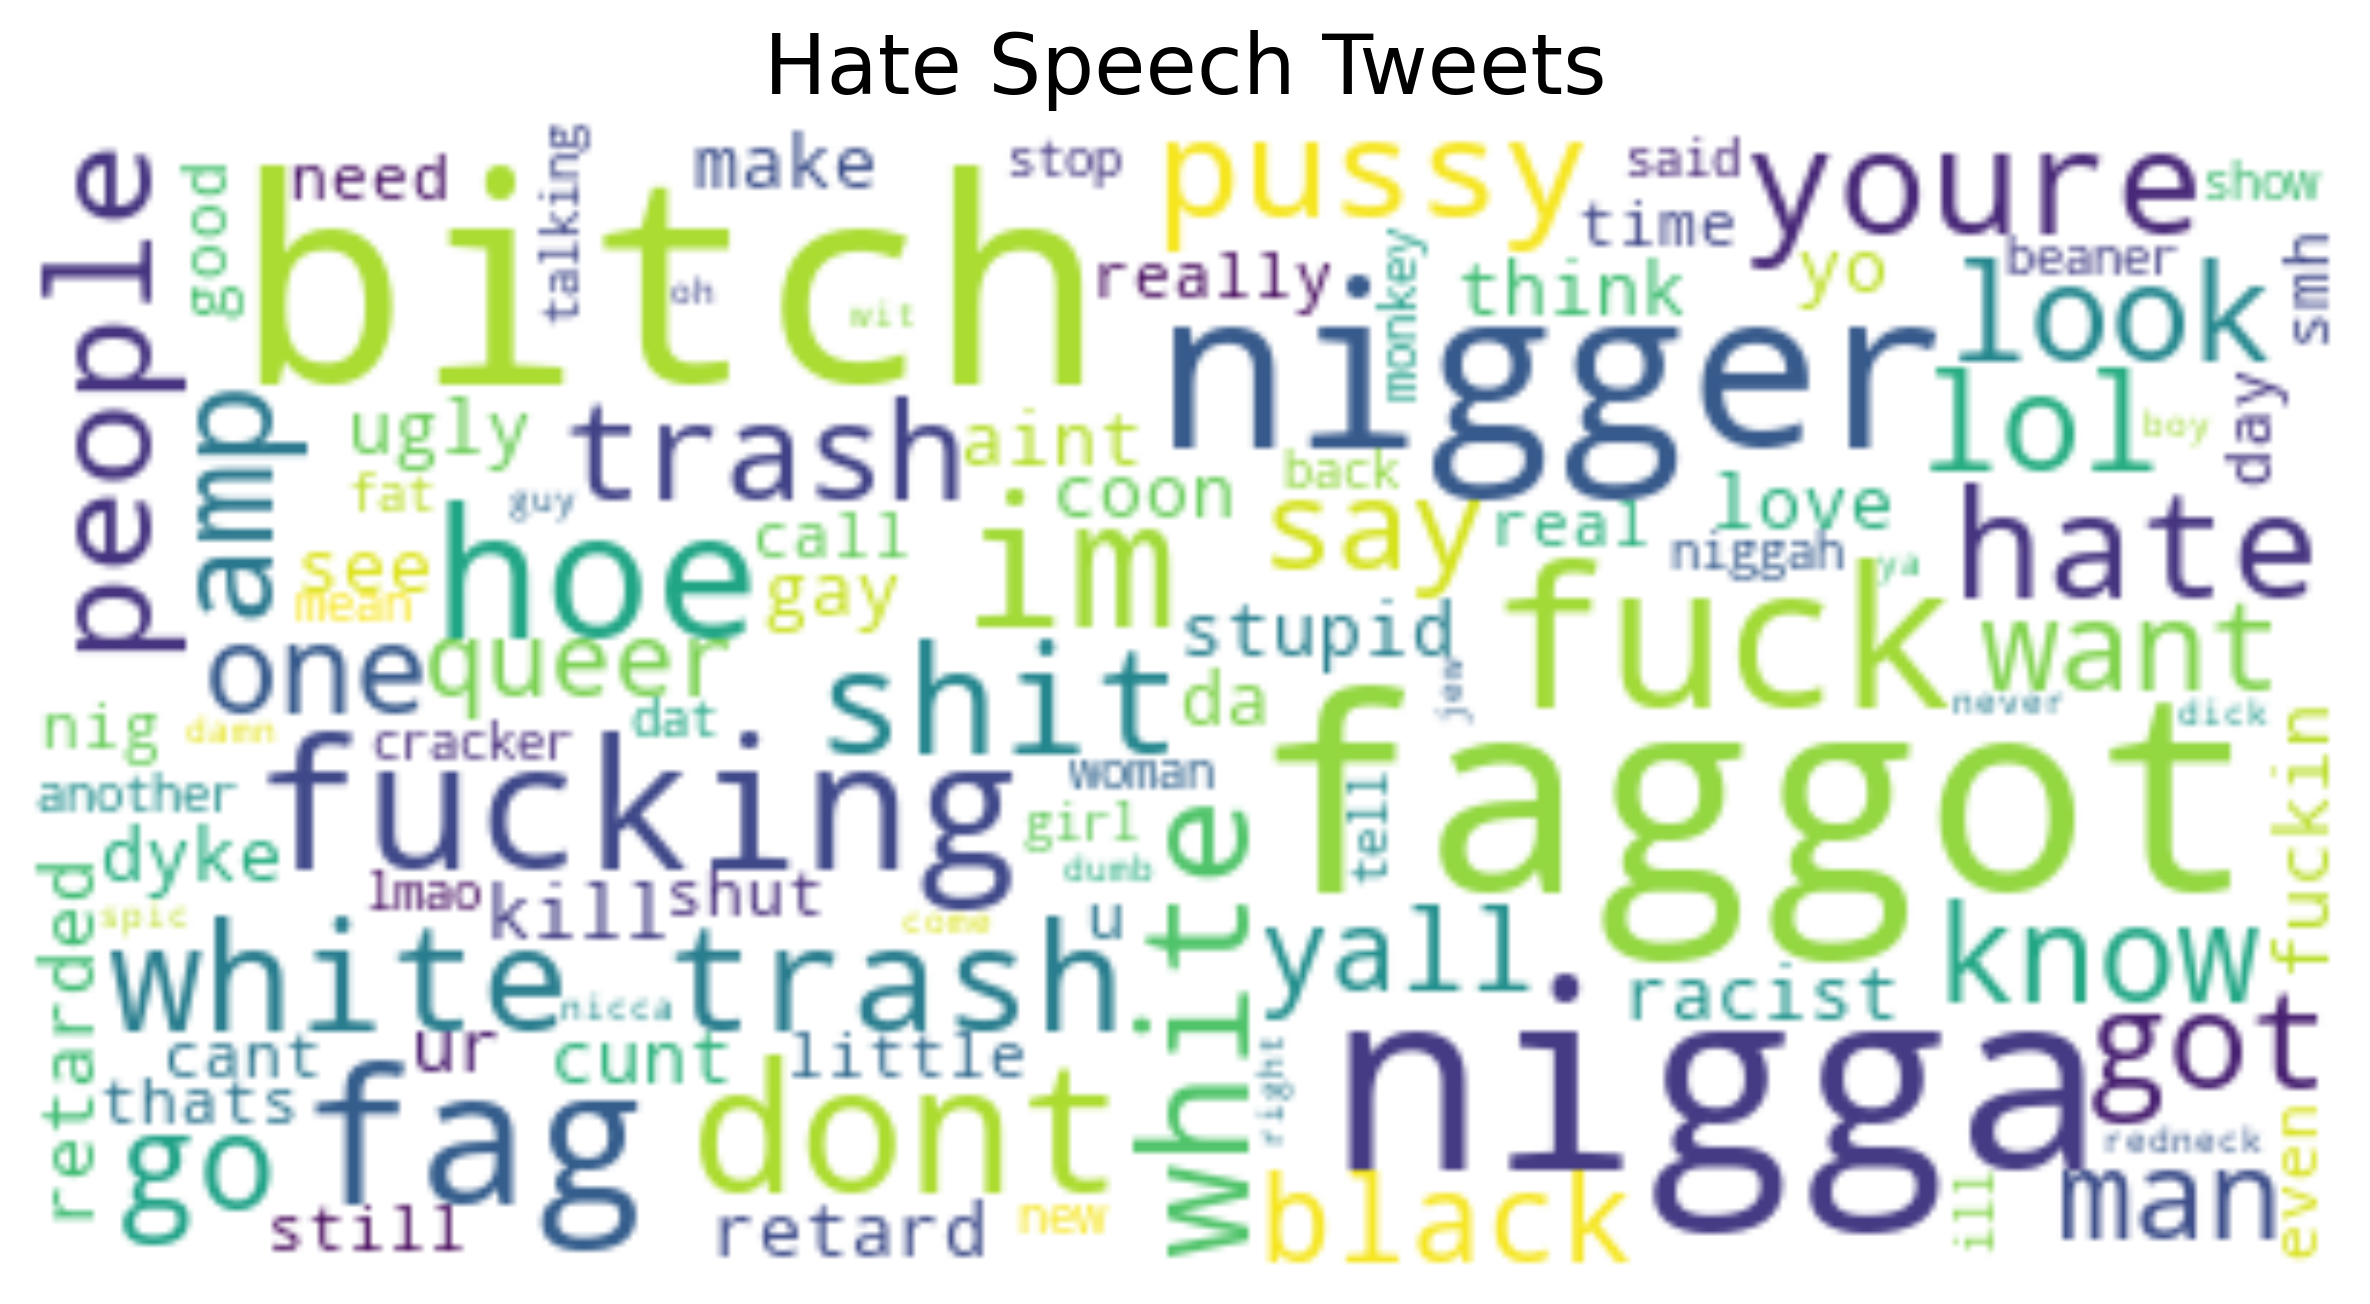

In [25]:
wordcloud = WordCloud(width=400, height=200, max_font_size=50, max_words=100, background_color="white")
wordcloud_all = wordcloud.generate(hateful_tweet)
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Hate Speech Tweets', fontsize=20)
plt.axis('off')
plt.show()

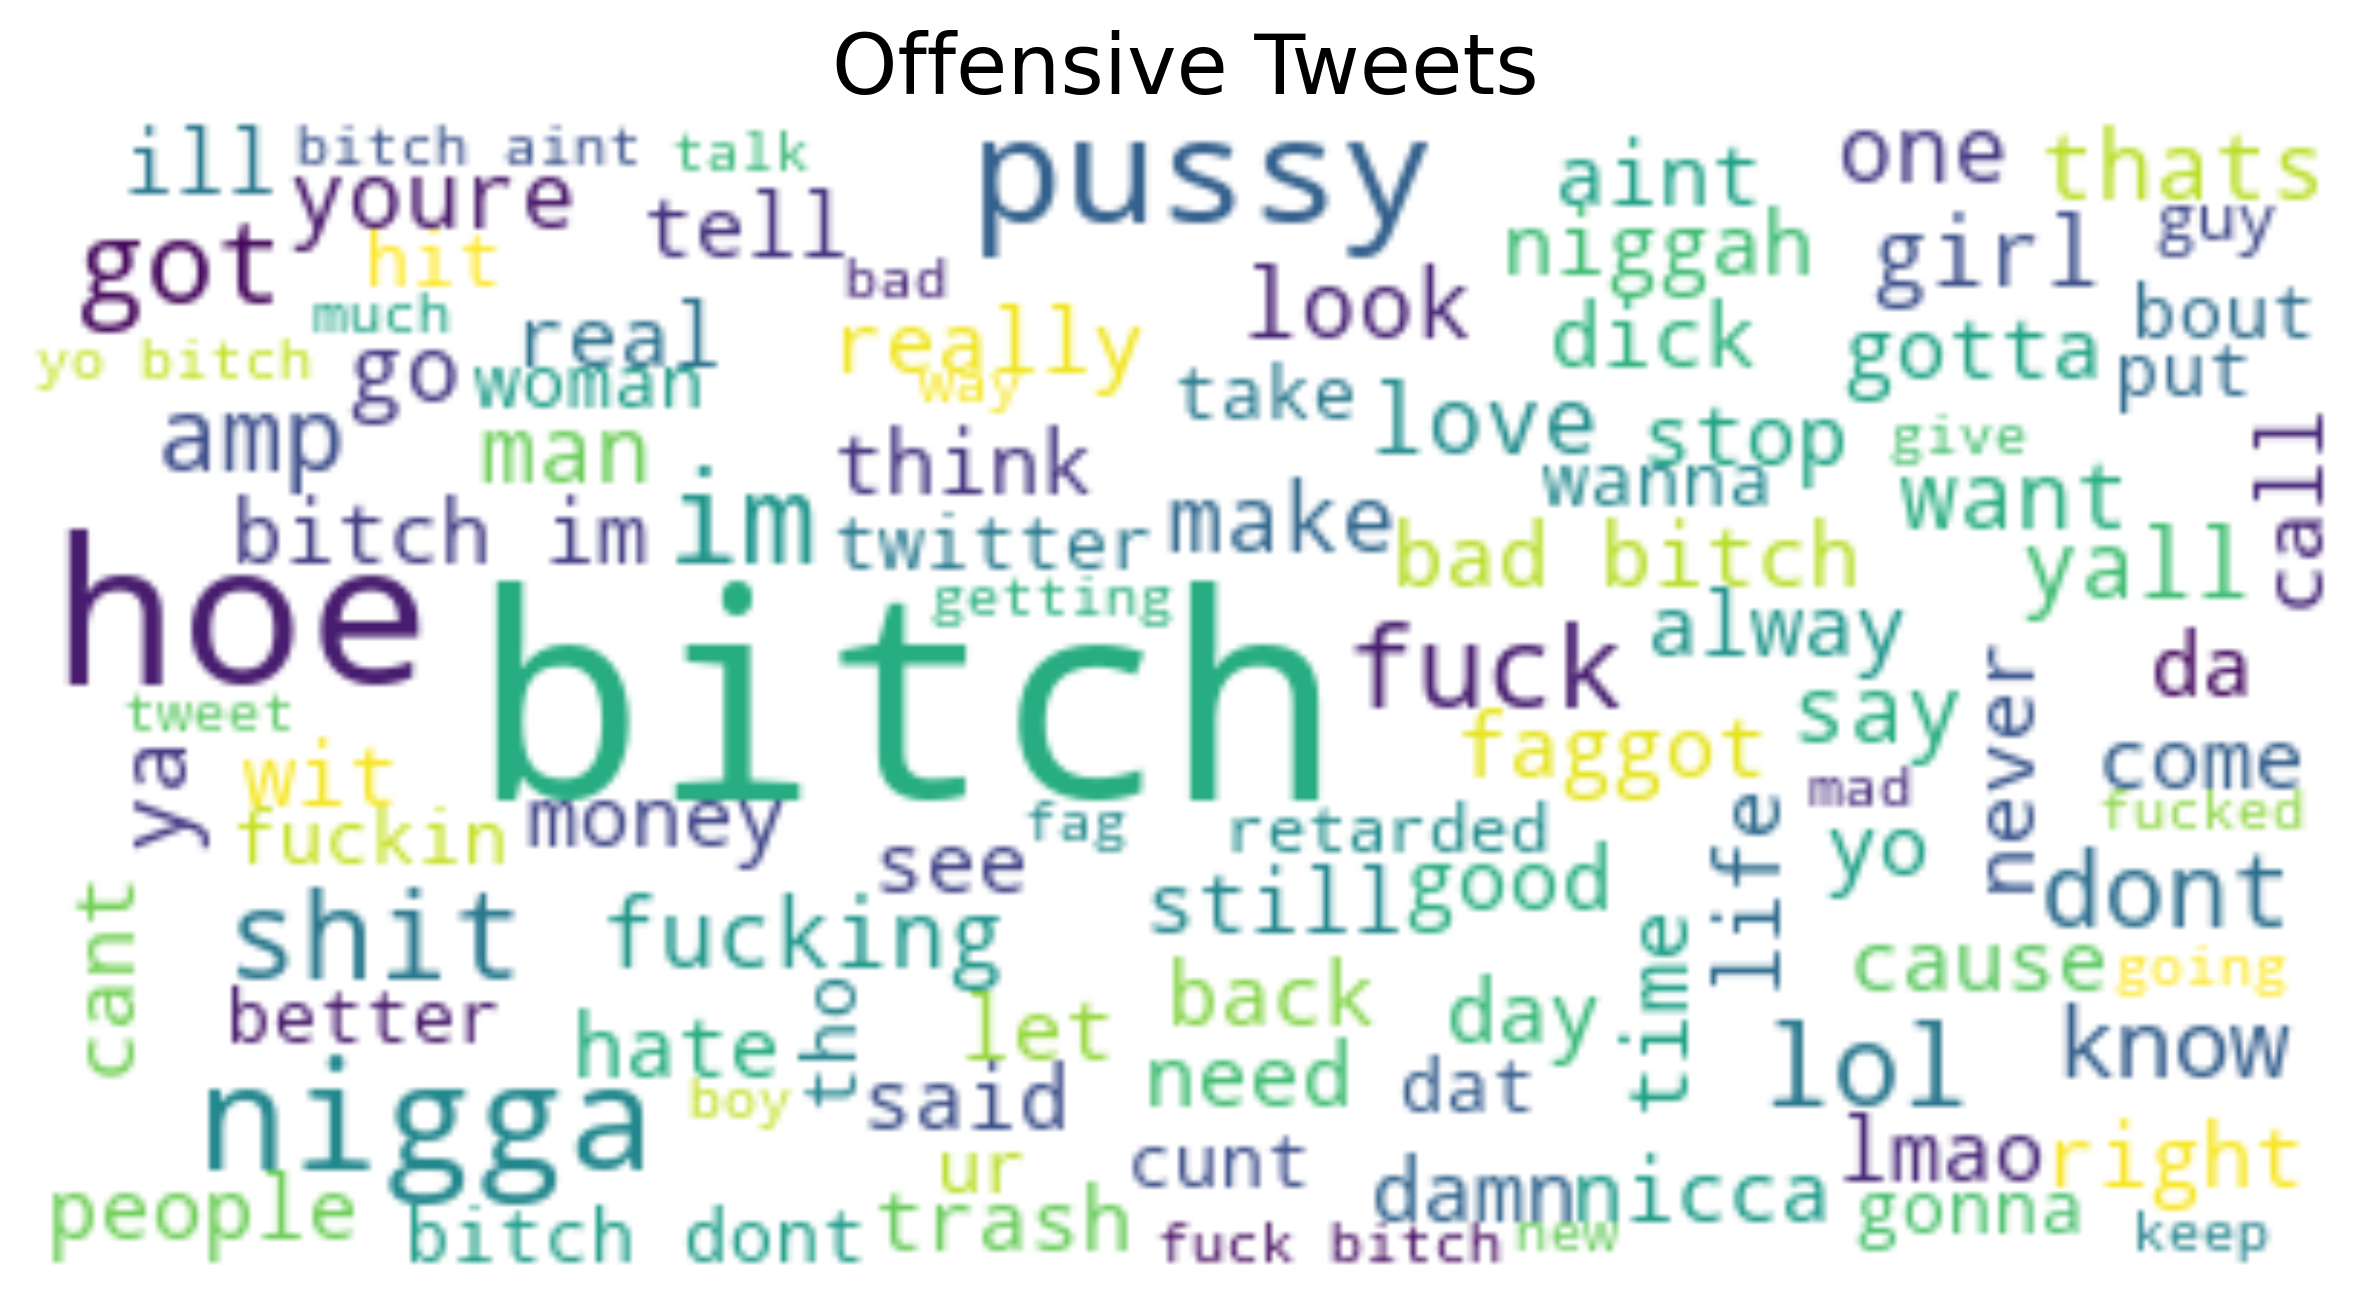

In [26]:
wordcloud = WordCloud(width=400, height=200, max_font_size=50, max_words=100, background_color="white")
wordcloud_all = wordcloud.generate(offensive_tweet)
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Offensive Tweets', fontsize=20)
plt.axis('off')
plt.show()

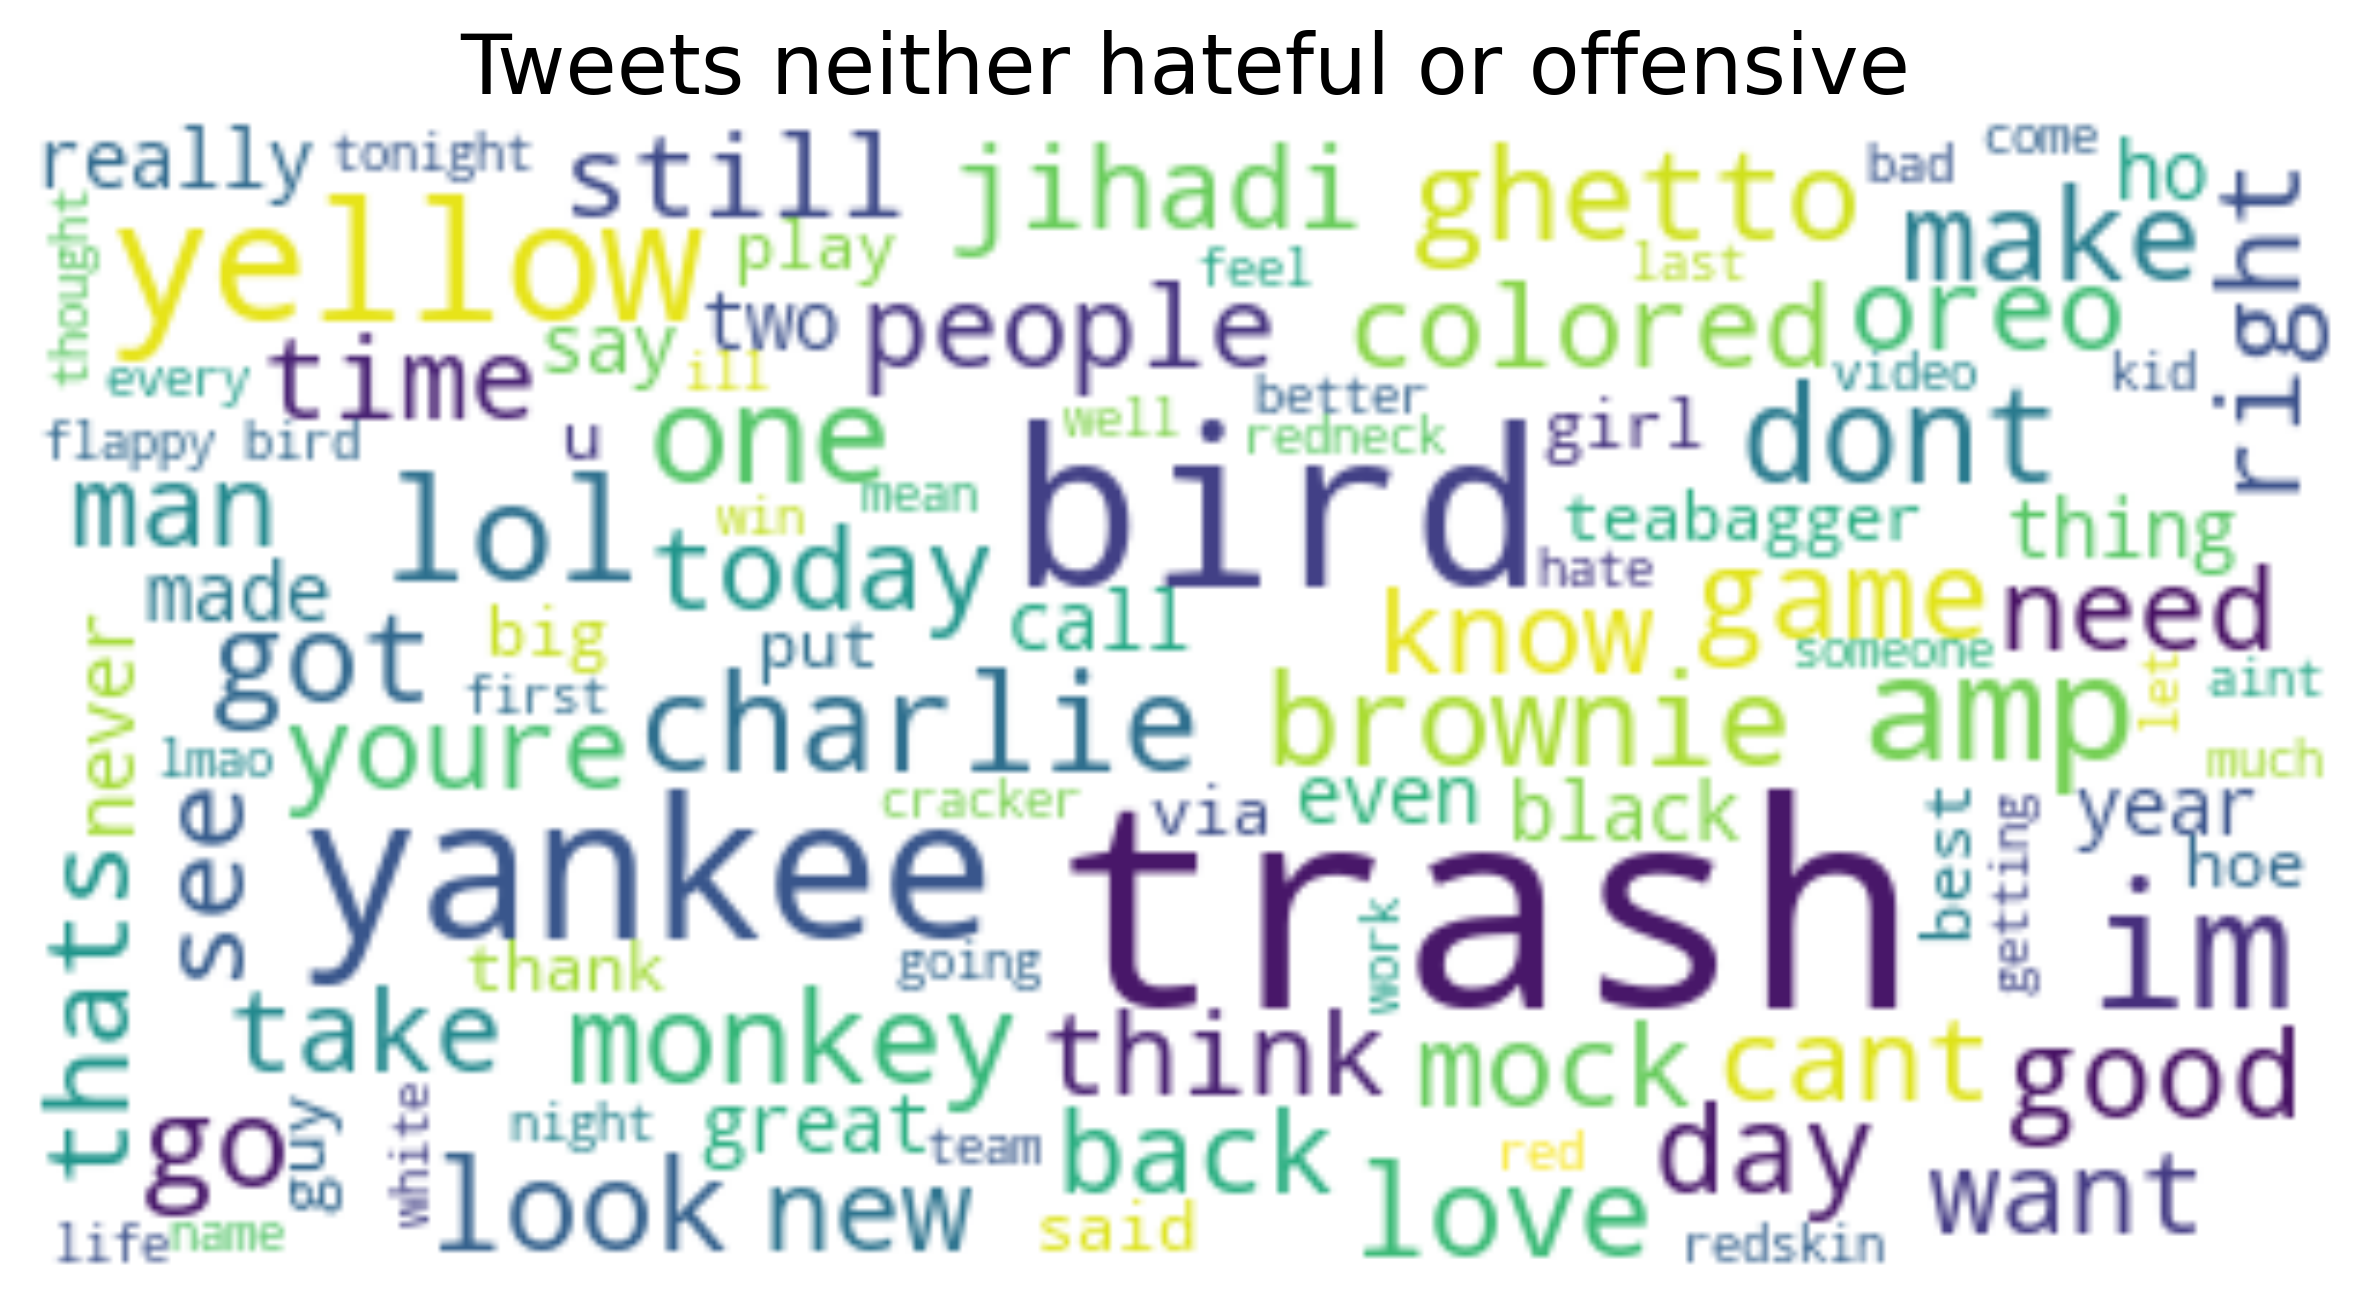

In [27]:
wordcloud = WordCloud(width=400, height=200, max_font_size=50, max_words=100, background_color="white")
wordcloud_all = wordcloud.generate(neither_tweet)
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Tweets neither hateful or offensive', fontsize=20)
plt.axis('off')
plt.show()

## Bigrams and Trigrams

In [28]:
# Tokenize the tweets
tweets = df['clean_tweet'].tolist()
tokens = [nltk.word_tokenize(tweet) for tweet in tweets]

In [38]:
# Generate bigrams
n = 2  # Example: for bigrams
grams = [gram for tweet in tokens for gram in ngrams(tweet, n)]

# Count the occurrence of each n-gram
bigram_counts = Counter(grams)

# Get the top 15 n-grams by frequency
top_bigrams = bigram_counts.most_common(15)
formatted_top_bigrams = [(f'{words[0]} {words[1]}', count) for words, count in top_bigrams]
bigrams, bi_counts = zip(*formatted_top_bigrams)

In [30]:
formatted_top_bigrams

[('wan na', 341),
 ('bad bitch', 320),
 ('got ta', 308),
 ('gon na', 293),
 ('look like', 268),
 ('as bitch', 254),
 ('like bitch', 250),
 ('bitch as', 239),
 ('bitch dont', 194),
 ('yo bitch', 188),
 ('bitch like', 182),
 ('fuck bitch', 179),
 ('as nigga', 176),
 ('bitch im', 166),
 ('bitch aint', 152)]

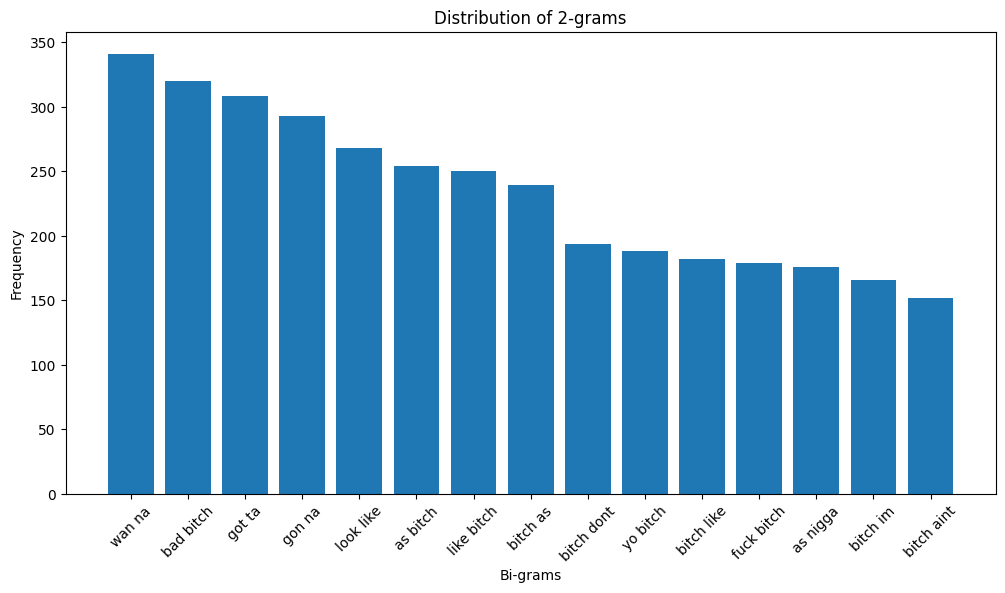

In [39]:
# Plot the n-gram distribution
plt.figure(figsize=(12, 6))
plt.bar(range(len(bigrams)), bi_counts)
plt.xticks(range(len(bigrams)), bigrams, rotation=45)
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.title(f'Distribution of {n}-grams')
plt.show()

In [40]:
# Generate bigrams
n = 3  # Example: for bigrams
grams = [gram for tweet in tokens for gram in ngrams(tweet, n)]

# Count the occurrence of each n-gram
trigram_counts = Counter(grams)

# Get the top 15 n-grams by frequency
top_trigrams = trigram_counts.most_common(15)
formatted_top_trigrams = [(f'{words[0]} {words[1]} {words[2]}', count) for words, count in top_trigrams]
trigrams, tri_counts = zip(*formatted_top_trigrams)

In [37]:
formatted_top_trigrams

[('hoe aint loyal', 68),
 ('bitch as nigga', 64),
 ('im gon na', 49),
 ('bitch look like', 38),
 ('bitch wan na', 38),
 ('dont love hoe', 33),
 ('dont wan na', 33),
 ('hoe as nigga', 30),
 ('bitch got ta', 28),
 ('bitch thing like', 24),
 ('stupid as bitch', 24),
 ('fuck right pussy', 23),
 ('yo bitch as', 23),
 ('bitch gon na', 22),
 ('wan na fuck', 22)]

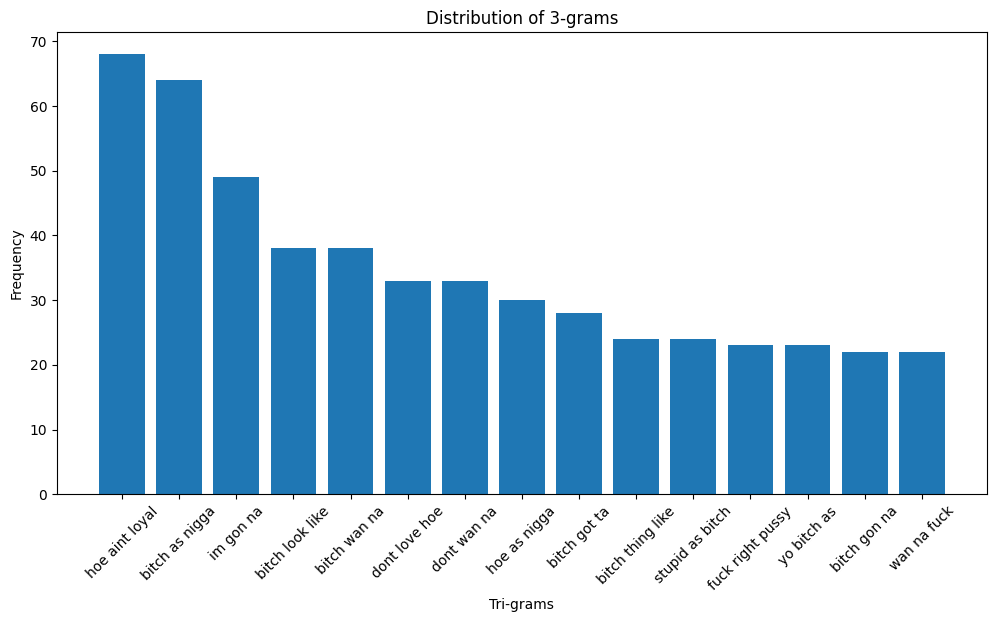

In [41]:
# Plot the n-gram distribution
plt.figure(figsize=(12, 6))
plt.bar(range(len(trigrams)), tri_counts)
plt.xticks(range(len(trigrams)), trigrams, rotation=45)
plt.xlabel('Tri-grams')
plt.ylabel('Frequency')
plt.title(f'Distribution of {n}-grams')
plt.show()